# Scatter Artist

In this example notebook, we show how to create a scatter plot using the `Scatter` class. The `Scatter` class is a subclass of the `Artist` class.

It has a simplified interface for creating scatter plots and updating some of its properties, like assigning different classes to points and displaying them with different colors based on a categorical colormap.

It can be imported like shown below:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from biaplotter.artists import Scatter
from nap_plot_tools.cmap import cat10_mod_cmap

## Creating a Scatter Plot

To create an empty scatter plot, just instanciate the `Scatter` class and provide an axes object as an argument.

C:\Users\mazo260d\Documents\GitHub\biaplotter\src\biaplotter\colormap.py:25: UserWarning: Categorical colormap detected. Setting categorical=True. If the colormap is continuous, set categorical=False explicitly.
  warnings.warn('Categorical colormap detected. Setting categorical=True. If the colormap is continuous, set categorical=False explicitly.')


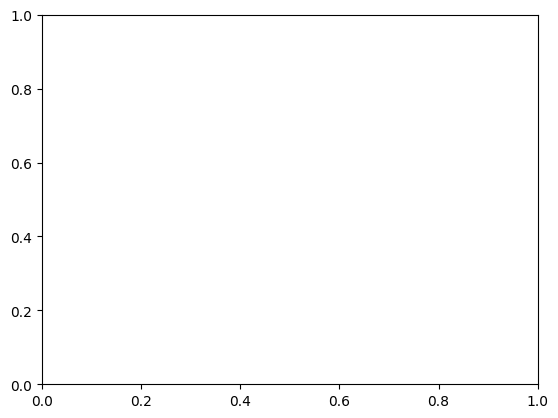

In [2]:
fig, ax = plt.subplots()
scatter = Scatter(ax)

## Adding Data to the Scatter Artist

To add data to the scatter plot, just feed the property `data` with a (N, 2) shaped numpy array. The plot gets updated automatically every time one of its properties is changed.

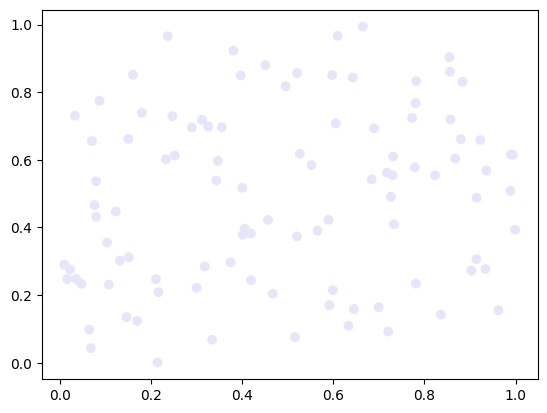

In [3]:
n_samples = 100
data = np.random.rand(n_samples, 2)
scatter.data = data
fig # show the updated figure

## Assigning Classes to Data Points

The `Scatter` artist comes with a custom categorical colormap, which can be used to assign different classes to points.

You can access the scatter current categorical colormap via its `overlay_colormap` attribute.

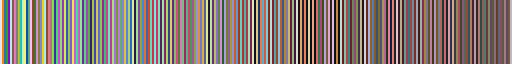

In [4]:
scatter.overlay_colormap

To assign classes to points, just feed the property `color_indices` with a (N,) shaped numpy array containing integers. These integers will be used as indices to the colormap.

Below, we randomly color the points with the 5 first colors of the scatter default colormap (light gray is the default color with color index 0).

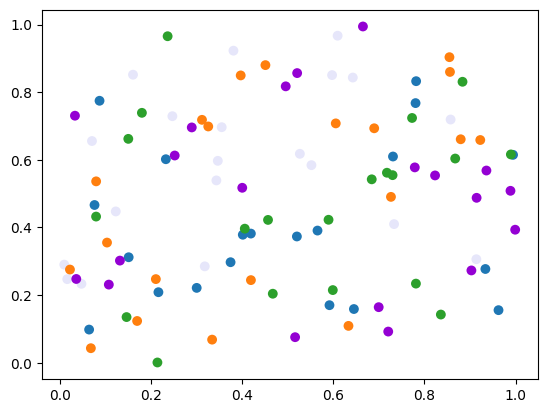

In [5]:
color_indices = np.linspace(start=0, stop=5, num=n_samples, endpoint=False, dtype=int)
scatter.color_indices = color_indices
fig

Colors are kept if new data is added.

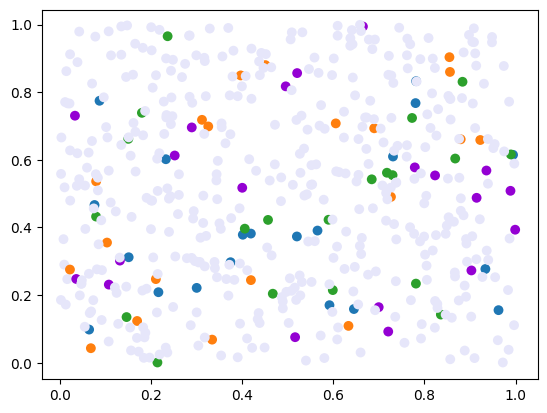

In [6]:
# Adding 400 more samples
n_samples = 400
data = np.concatenate([data, np.random.rand(n_samples, 2)])
scatter.data = data
fig

Set `color_indices` to `0` to reset the colors.

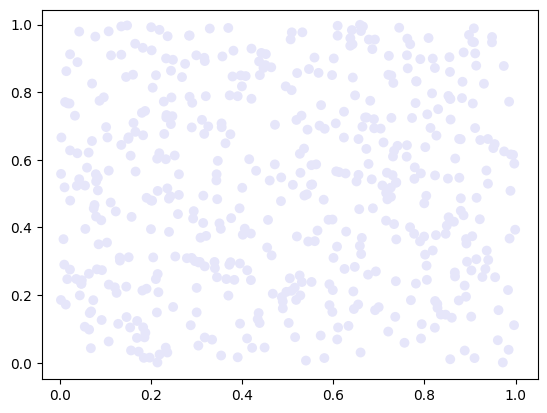

In [7]:
scatter.color_indices = 0
fig

## Properties

It is possible to further control properties of the scatter points, such as their size or transparency.

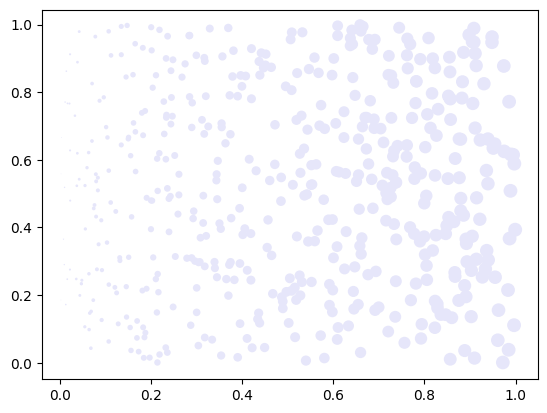

In [8]:
size = data[:, 0] * 100
scatter.size = size
fig

If you change to a continuous `overlay_colormap`, you can use the `color_indices` property to represent a feature of the data with colors, like the size example above.

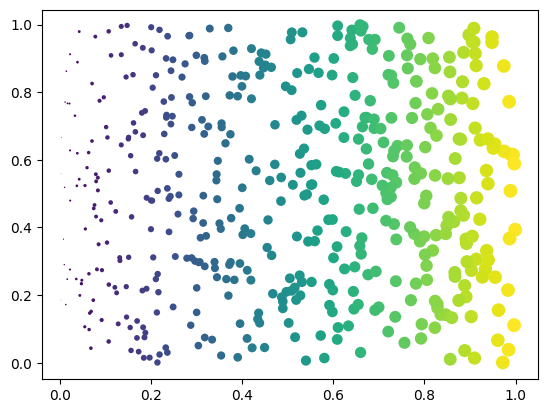

In [9]:
scatter.overlay_colormap = plt.cm.viridis
scatter.color_indices = size
fig

## Scatter Color Normalization

The `Scatter` class also provides different color normalization options. This is useful when you have a continuous feature that has a non-linear distribution.

In [10]:
feature = np.exp(10*data[:, 0])

We first show the feature colored in a 'linear' scale (default).

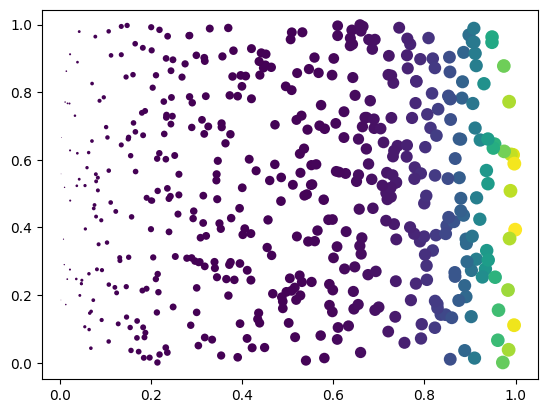

In [11]:
scatter.color_indices = feature
fig

Most of the points are colored in the same color, because the feature has a non-linear distribution.

Then, we normalize the color indices using the 'log' scale. The points are now colored in a more balanced way.

C:\Users\mazo260d\Documents\GitHub\biaplotter\src\biaplotter\artists.py:263: UserWarning: Log normalization applied to color indices with min value 1.0203403738854082. Values below 0.01 were set to 0.01.
  warnings.warn(


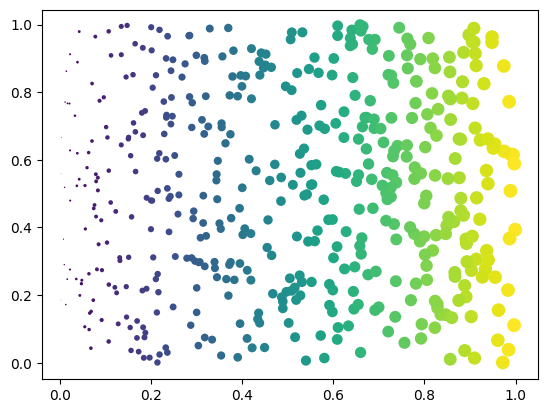

In [12]:
scatter.color_normalization_method = 'log'
fig

Of course this only makes sense if the colormap is continuous and the `color_indices` represent a feature. If we set the colormap back to categorical, the normalization is set back to 'linear' and you should replace the `color_indices` back the class numbers.

C:\Users\mazo260d\Documents\GitHub\biaplotter\src\biaplotter\colormap.py:25: UserWarning: Categorical colormap detected. Setting categorical=True. If the colormap is continuous, set categorical=False explicitly.
  warnings.warn('Categorical colormap detected. Setting categorical=True. If the colormap is continuous, set categorical=False explicitly.')
C:\Users\mazo260d\Documents\GitHub\biaplotter\src\biaplotter\artists.py:246: UserWarning: Color indices must be integers for categorical colormap. Change `overlay_colormap` to a continuous colormap or set `color_indices` to integers.
  warnings.warn(
C:\Users\mazo260d\Documents\GitHub\biaplotter\src\biaplotter\artists.py:249: UserWarning: Categorical colormap detected. Setting color normalization method to linear.
  warnings.warn(


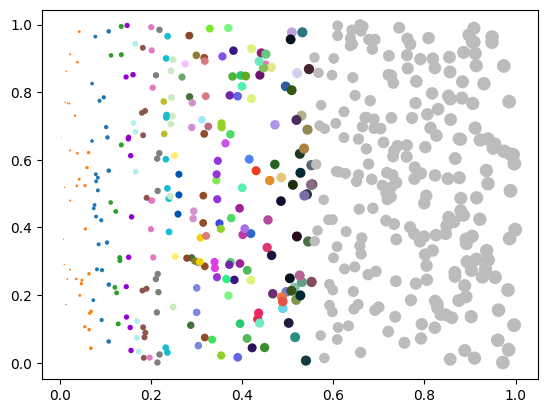

In [13]:
scatter.overlay_colormap = cat10_mod_cmap
fig

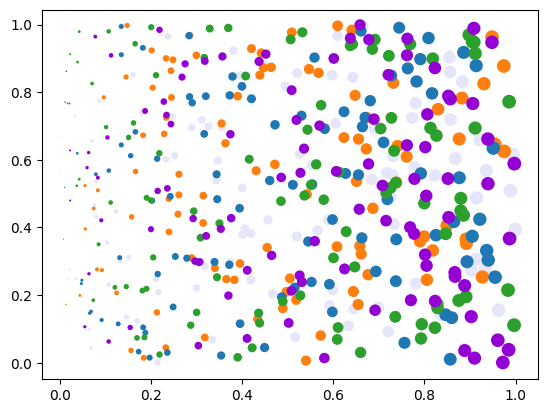

In [14]:
color_indices = np.linspace(start=0, stop=5, num=len(data), endpoint=False, dtype=int)
scatter.color_indices = color_indices
fig

## Scatter Visibility

Optionally, hide/show the artist by setting the `visible` attribute.

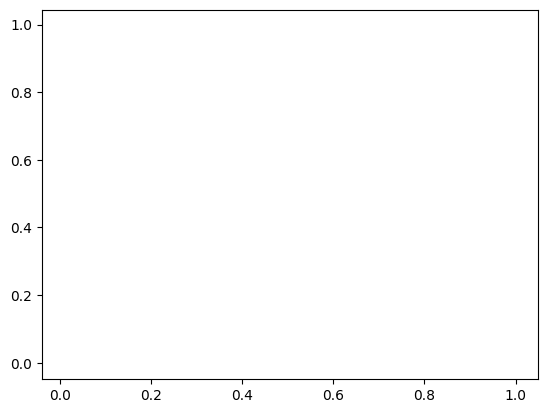

In [15]:
scatter.visible = False
fig

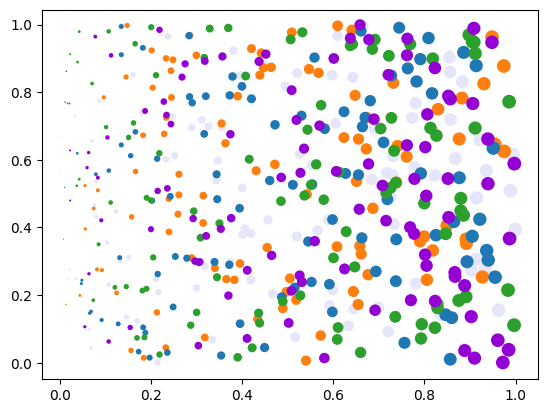

In [16]:
scatter.visible = True
fig